# Prueba de bondad de ajuste

## Distribucion normal

In [1]:
import funciones
import numpy as np
import pandas as pd
import scipy.stats as st
from fitter import Fitter, get_common_distributions

#### Ejercicio 8-88

Se observa y se anota la duracion en segundos que tarda un programa en ejecutarse.

In [12]:
tiempos = [
	(2.10, 16),
	(2.11, 28),
	(2.12, 41),
	(2.13, 74),
	(2.14, 149),
	(2.15, 256),
	(2.16, 137),
	(2.17, 82),
	(2.18, 40),
	(2.19, 19),
	(2.20, 11),
]

a) La distribucion normal parece ser un modelo de probabilidad razonable para la duracion de la ejecucion? Utilize $\alpha$ = 0.05
b) Encuentre el P-valor de esta prueba.

In [13]:
tiempos = funciones.desagrupar_datos(tiempos)

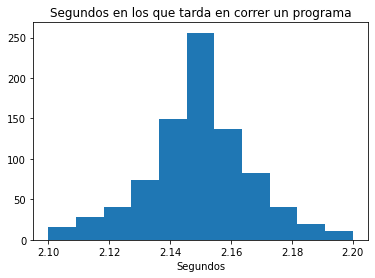

In [7]:
funciones.histograma(
	tiempos,
	titulo = 'Segundos en los que tarda en correr un programa',
	label_x = 'Segundos'
)

In [14]:
media = np.mean(tiempos)
desv = np.std(tiempos)
media, desv

(2.1492966002344667, 0.018945778130164553)

In [21]:
clases = 11

intervalo = []
for i in range(1, clases + 1):
	print(i, i / clases)
	val = st.norm.ppf(i / clases, media, desv)
	intervalo.append(val)
intervalo.insert(0, -np.inf)
intervalo

1 0.09090909090909091
2 0.18181818181818182
3 0.2727272727272727
4 0.36363636363636365
5 0.45454545454545453
6 0.5454545454545454
7 0.6363636363636364
8 0.7272727272727273
9 0.8181818181818182
10 0.9090909090909091
11 1.0


[-inf,
 2.124000619081622,
 2.132085159016555,
 2.137842260397352,
 2.1426891522055693,
 2.1471332709825255,
 2.151459929486408,
 2.155904048263364,
 2.160750940071581,
 2.1665080414523783,
 2.1745925813873113,
 inf]

In [17]:
df = pd.DataFrame({'lim_inf': intervalo[:-1], 'lim_sup': intervalo[1:]})
df

,lim_inf,lim_sup
0,-inf,2.124001
1,2.124001,2.132085
2,2.132085,2.137842
3,2.137842,2.142689
4,2.142689,2.147133
5,2.147133,2.151460
6,2.151460,2.155904
7,2.155904,2.160751
8,2.160751,2.166508
9,2.166508,2.174593


In [18]:
df['oi'] = df.apply(lambda x: sum([x['lim_inf'] <= i < x['lim_sup'] for i in sorted(tiempos)]), axis = 1)
df

,lim_inf,lim_sup,oi
0,-inf,2.124001,85
1,2.124001,2.132085,74
2,2.132085,2.137842,0
3,2.137842,2.142689,149
4,2.142689,2.147133,0
5,2.147133,2.151460,256
6,2.151460,2.155904,0
7,2.155904,2.160751,137
8,2.160751,2.166508,0
9,2.166508,2.174593,82
